# Importing the necessary packages

In [1]:
import pandas as pd
import skimage
import skimage.transform
from tensorflow.keras.preprocessing import image
from skimage import io

In [2]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Activation, BatchNormalization
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator,DirectoryIterator
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

from tensorflow.keras import backend as K
import os
import tensorflow as tf

In [3]:
# Path to data set
dir_data = os.path.join('/Users/ayankundu/Downloads/Mask_data/')


# Generate training and test data with Image Generator with a ratio of 9:1 of train and validation data
train_datagen = ImageDataGenerator(rescale=1/255,
                                  validation_split = 0.1)

# Takes the path to a directory & generates batches of augmented data.
# The train and test data is flowed from the directory in a batch
train_generator = train_datagen.flow_from_directory(dir_data,target_size=(256, 256),
                                                   batch_size= 32,
                                                   color_mode='rgb',
                                                   class_mode='categorical',
                                                   shuffle=False,
                                                   subset = 'training')

test_generator = train_datagen.flow_from_directory(dir_data,
                                                  target_size = (256,256),
                                                  batch_size = 32,
                                                  color_mode='rgb',
                                                  class_mode = 'categorical',
                                                  shuffle=False,
                                                  subset = 'validation')


# Fetch the data and the labels
x_train, y_train = next(train_generator)
x_test, y_test  = next(test_generator)


Found 6540 images belonging to 2 classes.
Found 726 images belonging to 2 classes.


In [4]:
# without_mask is the class that we want to notify
train_generator.class_indices

{'with_mask': 0, 'without_mask': 1}

# Design the model

In [5]:
## Design the model

model = Sequential([
    
# First convolution layer 
    Conv2D(16, (3,3), activation='relu', input_shape=(256, 256, 3)),
    MaxPooling2D(2, 2),

# Second convolution layer
    Conv2D(32, (3,3), activation='relu'),
    MaxPooling2D(2,2),

# Third convolution layer
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),

# Flatten the output   
    Flatten(),

# Dense hidden layer
    Dense(512, activation='relu'),
    Dropout(0.2),

# Final Output layer 
    Dense(2, activation='softmax') 
])

# Fit the model

In [6]:

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
# Train the model 
history = model.fit(train_generator,epochs=30,verbose=1)

2022-01-12 01:12:15.336713: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)
2022-01-12 01:12:15.336861: W tensorflow/core/platform/profile_utils/cpu_utils.cc:126] Failed to get CPU frequency: 0 Hz


Epoch 1/30
205/205 [==============================] - 49s 237ms/step - loss: 0.7931 - accuracy: 0.7480
Epoch 2/30
205/205 [==============================] - 49s 236ms/step - loss: 0.2380 - accuracy: 0.9182
Epoch 3/30
205/205 [==============================] - 49s 237ms/step - loss: 0.1569 - accuracy: 0.9450
Epoch 4/30
205/205 [==============================] - 49s 238ms/step - loss: 0.1687 - accuracy: 0.9453
Epoch 5/30
205/205 [==============================] - 49s 239ms/step - loss: 0.1358 - accuracy: 0.9527
Epoch 6/30
205/205 [==============================] - 49s 241ms/step - loss: 0.0938 - accuracy: 0.9685
Epoch 7/30
205/205 [==============================] - 50s 242ms/step - loss: 0.1399 - accuracy: 0.9549
Epoch 8/30
205/205 [==============================] - 50s 242ms/step - loss: 0.0880 - accuracy: 0.9694
Epoch 9/30
205/205 [==============================] - 50s 243ms/step - loss: 0.0908 - accuracy: 0.9689
Epoch 10/30
205/205 [==============================] - 51s 249ms/step - l

In [2]:
from keras.models import load_model
# save the model in disk
#model.save('CNN_model.h5')  


In [3]:
# load the saved model
model = load_model('CNN_model.h5')

# Model architecture

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 254, 254, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 127, 127, 16)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 125, 125, 32)      4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 62, 62, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 60, 60, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 30, 30, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 57600)             0

# Predict the class for an unseen data

It's a face without mask!


/Users/ayankundu/miniforge3/envs/tffinal/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


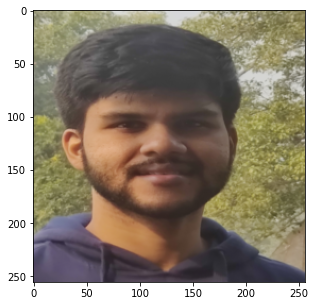

In [9]:
# Predict the class for an unseen data

test_image_dir =  '/Users/ayankundu/Downloads/IMG_20211223_132620.jpg'

# Read the image from the path and reshape it to (256,256), same shape passed for training
images = skimage.io.imread(test_image_dir)
images = skimage.transform.resize(images, (256,256))

images = image.img_to_array(images)
images = np.expand_dims(images, axis=0)

# Predict the probabilities for both the classes
preds = model.predict_proba(images)
predicted_class_prob = np.max(preds)

# Plot the image for which we want to predict the class
fig, ax = plt.subplots(1, 1, figsize=(5,5))
ax.imshow(images[0])


# Predict the class which is predicted with highest probability by the model
if preds[0][0]>preds[0][1]:
    print('It\'s face with mask!')
else:
    print('It\'s a face without mask!')

#print(predicted_class_prob)

In [10]:
images[0].shape

(256, 256, 3)

# LIME interpretation of the image

## Segmentation of the image

In [11]:
from lime.wrappers import scikit_image

In [12]:
# segmentation using quickshift algorithm
segmentation_fn = scikit_image.SegmentationAlgorithm('quickshift', kernel_size=4,
                                                    max_dist=200, ratio=0.2,
                                                    random_seed=12)
segments = segmentation_fn(images[0])

In [13]:
segments.shape

(256, 256)

In [14]:
# Numbers of superpixels or features of the image
np.unique(segments)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45])

Superpixels of the image


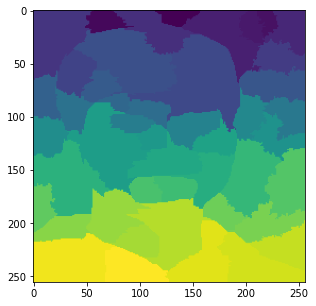

In [15]:
fig, ax = plt.subplots(1, 1, figsize=(5,5))
ax.imshow(segments)
print('Superpixels of the image')

## Creation of perturbed samples

In [16]:
from sklearn.utils import check_random_state
import copy
from lime import lime_image

explainer = lime_image.LimeImageExplainer()

In [17]:
# hide_color=0 means we want superpixels of this color will be hidden while creating purturbed samples
hide_color=0

In [18]:
# Creating the fudged_image: a 3-D numpy array(image) to replace original image when superpixel is turned off

fudged_image = images[0].copy()

# If hide_color is not None superpixels of hide_color(here 0) will be used to create fudged_image, otherwise mean pixel color will be used

if hide_color is None:
    for x in np.unique(segments):
        fudged_image[segments == x] = (
            np.mean(images[0][segments == x][:, 0]),
            np.mean(images[0][segments == x][:, 1]),
            np.mean(images[0][segments == x][:, 2]))
else:
    fudged_image[:] = hide_color

In [19]:
print(fudged_image.shape)

(256, 256, 3)


In [20]:
# Creating the perturbed samples and predicting their class y using the CNN model
# btach_size=10 means classifier function will be called in a batch size of 10 to predict the labels for the perturbed samples
data,labels=explainer.data_labels(images[0], fudged_image, segments,
                                        classifier_fn=model.predict, num_samples=1000,
                                        batch_size=10
                                        )

  0%|          | 0/1000 [00:00<?, ?it/s]

In [21]:
# Example of a perturbed sample
data[1]

array([0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0])

In [22]:
# shape of a pertubed sample
print(data[1].shape)

(46,)


In [23]:
### How perturbed images will look like???

def perturbed_images_generation(image,fudged_image,segments,data):
    rows = data
    imgs = []
    req_images=[]
    # Iterate through each of the row of the array called data
    for row in rows:
        # temp a copy of the original image
        temp = copy.deepcopy(images[0])
        # Finding the indexes of the zeros in each row
        zeros = np.where(row == 0)[0]
        # create an temporary array called mask same shape as of segments(here (256,256)) which contains all the values as False
        mask = np.zeros(segments.shape).astype(bool)
        # For each zero(off superpixel) in each row of data replace the image by the fudged_image 
        for z in zeros:
            mask[segments == z] = True
        temp[mask] = fudged_image[mask]
        imgs.append(temp)
        req_images.extend(imgs)
        imgs = []
            
    return req_images

In [24]:
# Perturbed images
perturbed_images=perturbed_images_generation(images[0],fudged_image,segments,data)

In [25]:
# Calculate the distances between perturbed images and original image
import sklearn
distances = sklearn.metrics.pairwise_distances(
            data,
            data[0].reshape(1, -1),
            metric='cosine'
        ).ravel()

In [26]:
# Find the top 3 closest perturbed images
df=pd.DataFrame(distances,columns=['distance'])
df1=df.sort_values(by='distance')
df1=df1.drop_duplicates(keep='first')
req_index=df1.index[1:4]
req_index

Int64Index([393, 622, 179], dtype='int64')

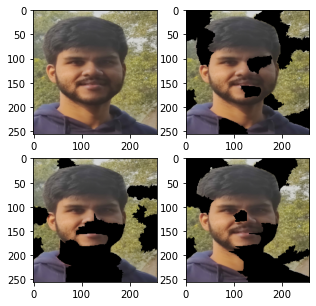

In [27]:
# Plotting the original and top 3 closest perturbed images
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2,figsize=(5,5))
ax1.imshow(perturbed_images[0])
ax2.imshow(perturbed_images[req_index[0]])
ax3.imshow(perturbed_images[req_index[1]])
ax4.imshow(perturbed_images[req_index[2]])

## Weightage calculation

In [28]:
# for LIME
from lime.lime_base import LimeBase
from sklearn.linear_model import Ridge, lars_path
from functools import partial
import scipy as sp
from sklearn.utils import check_random_state

In [29]:
# Exponential kernel
def kernel(d, kernel_width):
    return np.sqrt(np.exp(-(d ** 2) / kernel_width ** 2))

In [30]:
# exponential kernel with kernel width 25
kernel_fn = partial(kernel, kernel_width=25)

In [31]:
# Samples are given weights using exponential kernel
weights=kernel_fn(distances)

## Selection of top features

In [32]:
from sklearn.linear_model import Ridge

In [33]:
# We want the explanation for 'without_mask' class
labels_column = labels[:, 1]

In [34]:
# we want top 10 features in our explanation
# Ridge regression is fitted on the local data
clf = Ridge(alpha=0.01, fit_intercept=True)
clf.fit(data, labels_column, sample_weight=weights)
coef = clf.coef_


In [35]:
labels

array([[9.6529373e-36, 1.0000000e+00],
       [1.0000000e+00, 4.2077265e-33],
       [1.0000000e+00, 0.0000000e+00],
       ...,
       [1.1548717e-39, 1.0000000e+00],
       [1.0000000e+00, 0.0000000e+00],
       [1.0000000e+00, 1.3712203e-29]], dtype=float32)

In [36]:
coef

array([ 3.38232048e-02,  1.13020515e-01, -2.34866755e-02, -3.60482853e-02,
       -4.94788082e-02, -7.41912931e-02, -3.88372085e-02,  1.31001753e-01,
        1.24918901e-01,  3.72495815e-02, -1.53883420e-02, -1.91375015e-01,
       -1.09788317e-01,  1.20358432e-01,  7.50576546e-03, -1.19806716e-02,
        9.98682379e-02, -5.47429075e-02,  5.02981591e-02, -4.50712437e-02,
        5.90113326e-02, -1.64561280e-01, -7.56801766e-03, -2.25775543e-02,
        9.83567618e-02, -1.28124468e-01,  1.35549420e-02,  3.42933395e-01,
        1.01073115e-01, -6.19265012e-02,  1.23495831e-01,  8.69026164e-02,
        1.35407194e-01, -1.93495731e-02,  1.58056518e-02, -1.85353937e-02,
        1.72508779e-04, -7.47195077e-02,  1.20033635e-01, -4.72906082e-02,
        1.50670769e-01,  1.73702949e-01,  6.26530811e-02,  8.70653619e-02,
        4.03705079e-02,  5.48699182e-02])

In [37]:
num_features = 10
top_features = np.argsort(np.abs(coef))[-num_features:] 
top_features

array([30,  8, 25,  7, 32, 40, 21, 41, 11, 27])

## Prediction done by local linear model

In [40]:

# After getting the features Ridge regression is used to fit the local model 

model_regressor = Ridge(alpha=0.01, fit_intercept=True)
                                
easy_model = model_regressor
easy_model.fit(data[:, top_features],
               labels_column, sample_weight=weights)
prediction_score = easy_model.score(
    data[:, top_features],
    labels_column, sample_weight=weights)

local_pred = easy_model.predict(data[0, top_features].reshape(1, -1))


In [41]:
local_pred

array([0.65922107])

## Final output of LIME

In [4]:
# import the necessary packages
from lime import lime_image
from skimage.segmentation import mark_boundaries

explainer = lime_image.LimeImageExplainer()

In [43]:
# top_labels=2 means we want the explanation for 2 levels
# hide_color=0 means superpixels of this color will be hidden while creating perturbed samples
# num_samples=1000 means a total 1000 perturbed samples will be created in the neighbourhood of an image
explanation = explainer.explain_instance(images[0], model.predict,  
                                         top_labels=2,hide_color=0, num_samples=1000)

  0%|          | 0/1000 [00:00<?, ?it/s]

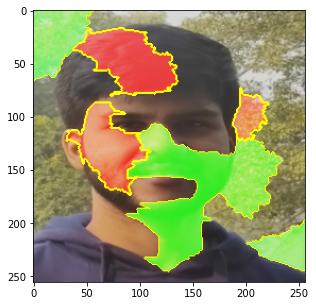

In [44]:
# We want to see the superpixels that are affecting postively and negatively in the prediction 
# we want to see top 10 superpixels in the explanation
temp, mask = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=False,negative_only=False, num_features=10, hide_rest=False)

fig, ax = plt.subplots(1,1, figsize=(5,5))
ax.imshow(mark_boundaries(temp, mask))
